In [45]:
# Rain Type Dataset Shapes: Features - (641802, 104) , Labels 1 or 0 - (641802, 1); Rain type classificaation for 1d data. I want to use 1D DNN, 1D CNN and 1D LSTM to compare the results.
# Use as many visualizations as possible to show the results. Use Tensorflow for the implementation. 
# Dataset is already in  files rain_type_dataset.npy. I need to split the data into train and test sets (80-20)
# Data sample represents 104 statistical data of 15x15 grid, 1d data. 
# To analyze the results, I need to use the following metrics: Accuracy, Precision, Recall, F1 score, Confusion matrix, Loss, Learning curve.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

2023-11-21 05:40:31.765577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 05:40:31.843541: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 05:40:31.867389: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 05:40:32.169075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [2]:
# Importing the dataset
dataset = np.load('/lustre/home/sasha/GPM/datasets/rain_type_dataset.npy')
X = dataset[:, 0:104]
y = dataset[:, 104]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Reshaping the data
X_train = X_train.reshape(X_train.shape[0], 104, 1)
X_test = X_test.reshape(X_test.shape[0], 104, 1)

# Check the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Look at the data
print(X_train[0])
print(y_train[0])


(513441, 104, 1)
(128361, 104, 1)
(513441,)
(128361,)
[[ 0.00227516]
 [-0.07490883]
 [ 0.05397129]
 [-0.00988262]
 [ 0.19120934]
 [ 0.00199384]
 [-0.12857892]
 [ 0.20303537]
 [ 0.20431792]
 [ 0.26176556]
 [ 0.31807372]
 [ 0.18967568]
 [ 0.21547094]
 [ 0.92475436]
 [-0.4259321 ]
 [ 0.04782383]
 [-0.95843865]
 [ 0.0018094 ]
 [ 0.46404265]
 [-0.84622895]
 [-0.68278788]
 [-0.77061066]
 [-0.87208407]
 [-0.78444158]
 [-0.71775954]
 [-0.98013998]
 [-0.27553644]
 [-1.16874936]
 [-0.49923245]
 [ 0.22728126]
 [-0.90808182]
 [-0.80429782]
 [-0.83417598]
 [-0.91782271]
 [-0.87233017]
 [-0.8023451 ]
 [ 0.42241958]
 [-1.26793646]
 [ 0.64024497]
 [ 0.94829793]
 [-0.56045013]
 [-0.56211821]
 [-0.52983729]
 [-0.65092297]
 [-0.42546674]
 [-0.44132401]
 [-1.1162016 ]
 [-0.06248058]
 [ 0.95256532]
 [-0.53965591]
 [-0.61051009]
 [-0.51841191]
 [-0.61813029]
 [-0.43497776]
 [-0.44863286]
 [ 1.47582209]
 [ 1.53097611]
 [-0.03498515]
 [-0.07240546]
 [-0.17865632]
 [-0.32448753]
 [ 0.02050769]
 [-0.05577814]
 

In [29]:
# Building the model
# Activation function of output layer - sigmoid function is chosen because this is a binary classification problem. As for the activation function of hidden layers, LeakyReLU is used. In order to prevent overfitting, dropout processes are inserted into hidden layers.
# The loss function is binary cross entropy, and the optimizer is Adam.
tf.random.set_seed(0)

model = Sequential()
model.add(Conv1D(64, 2, activation = 'relu', input_shape = (104, 1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv1D(64, 2, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

# Fitting the model
history = model.fit(X_train, y_train, batch_size = 64, epochs = 50)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 103, 64)           192       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 51, 64)           0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 51, 64)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 50, 64)            8256      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 25, 64)           0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 25, 64)           

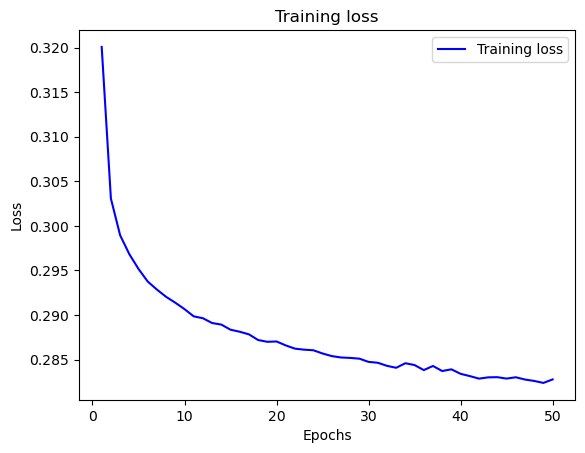

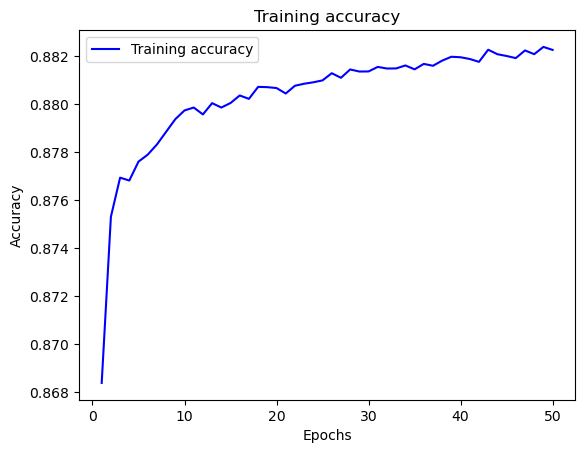

In [30]:
# Evaluating the model
# Loss
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 120/4012 [..............................] - ETA: 1s  

4012/4012 [==============================] - 2s 418us/step
[[66165  8579]
 [ 6715 46902]]


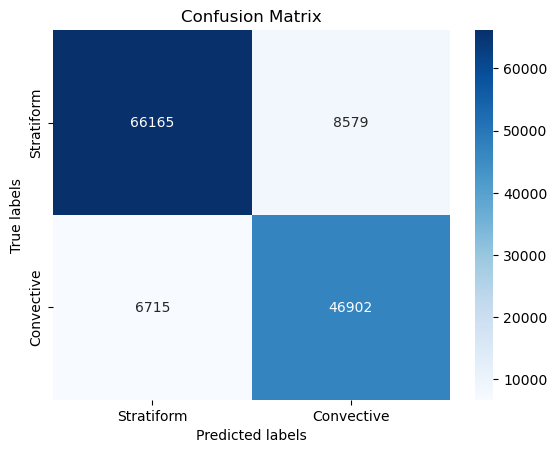

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     74744
         1.0       0.85      0.87      0.86     53617

    accuracy                           0.88    128361
   macro avg       0.88      0.88      0.88    128361
weighted avg       0.88      0.88      0.88    128361

Accuracy:  0.880851660551102
Precision:  0.8453704871938141
Recall:  0.8747598709364567
F1 score:  0.8598141120827145


In [31]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizing the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Stratiform', 'Convective'])
ax.yaxis.set_ticklabels(['Stratiform', 'Convective'])
plt.show()


# Classification report
print(classification_report(y_test, y_pred))

# Accuracy, precision, recall, F1 score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))


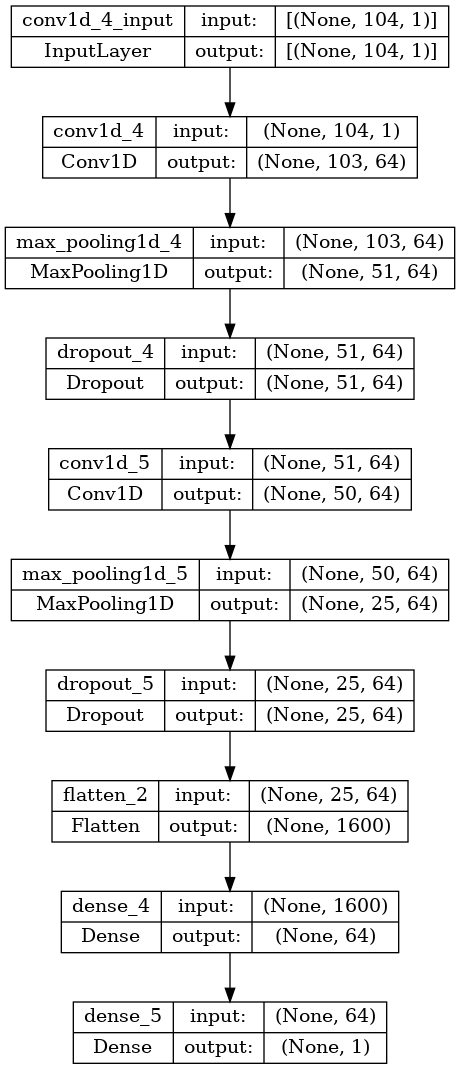

In [19]:
tf.keras.utils.plot_model(model, to_file='1DCNN_50epoch.png', show_shapes=True, show_layer_names=True)